In [21]:
import pandas as pd
import plotly.graph_objects as go # pip install plotly
import numpy as np
from plotly.graph_objs import *
from scipy import stats
import scipy as sp

In [22]:
ECG_Features = pd.read_csv("ECG.csv")
del ECG_Features['Unnamed: 0']
# Number of features : Nf = 30
Nf=ECG_Features.shape[1]-1
ECG_Features.head()

In [23]:
"""
# List for 3D visualization : aborted !
ECG_Feature_Value=[]
for k in range(0,23):
    for j in range(0,18):
        for f in range(0,Nf):
            if not(np.isnan(ECG_Features.iloc[18*k+j,1+f]) or np.isinf(ECG_Features.iloc[18*k+j,1+f])):
                ECG_Feature_Value.append(ECG_Features.iloc[18*k+j,1+f])
            else:
                ECG_Feature_Value.append(0)
"""

In [24]:
"""
m=np.min(ECG_Feature_Value)
M=np.max(ECG_Feature_Value)
Colors=[]
Sizes=[]
Color_Amplification=10
for c in range(0,len(ECG_Feature_Value)):
    Colors.append('rgb('+str(round(255*Color_Amplification*(ECG_Feature_Value[c]-m)/(M-m),1))+','+str(round(255*(ECG_Feature_Value[c]-m)/(M-m),1))+','+str(round(255*(ECG_Feature_Value[c]-m)/(M-m),1))+')')
    if not(ECG_Feature_Value[c]==0):
        Sizes.append(7)
    else:
        Sizes.append(0)
"""

In [25]:
"""
# 3D Visualization : aborted !
fig = go.Figure(data=go.Scatter3d(
    x = np.tile([c for c in range(0,23)],18*Nf)
    ,y = np.tile([np.tile(c,Nf) for c in range(0,18)],23).reshape(18*23*Nf)#np.tile([c for c in range(0,18)],23*Nf)
    ,z = np.tile([c for c in range(0,Nf)],18*23)
    #text = planets,
    ,mode = 'markers',
    marker = dict(
        sizemode = 'diameter',
        size = Sizes, #ECG_Feature_Value,
        color = Colors#['rgb(0,0,255)' for c in range(0,18*23*Nf)],
        )
))
fig.update_layout(
    title="Bubble Plot for the ECG features",
    scene=Scene(
        xaxis=XAxis(title='Subject number'),
        yaxis=YAxis(title='Video number'),
        zaxis=ZAxis(title='Feature number')
    )
    #zaxis_title="Feature number",
    #font=dict(
    #    family="Courier New, monospace",
    #    size=18,
    #    color="#7f7f7f")
    )
fig.show()
"""

In [ ]:
from ipywidgets import widgets
import plotly.express as px

ECG_Feature_Widget = widgets.Dropdown(
    options=list(ECG_Features.columns[0:Nf]),
    value='ECG_Rate_Mean',
    description='Feature :',
)

#graphic = go.Histogram(x=ECG_Features['ECG_Rate_Mean'], opacity=0.75, name='Some data')
data=ECG_Features['ECG_Rate_Mean']
graphic = go.Histogram(x=data, opacity=0.75, name='Some data')
g = go.FigureWidget(data=[graphic],
                    layout=go.Layout(
                        title=dict(
                            text='Interactive visualization of the ECG Features (Histogram)'
                        ),
                        barmode='overlay',
                        xaxis=dict(title = ''), yaxis=dict(title = 'Counts[#]')
                    ))

def validate():
    if ECG_Feature_Widget.value in ECG_Features[1:Nf].unique():
        return True
    else:
        return False


def response(change):
            g.data[0].x = ECG_Features[ECG_Feature_Widget.value]
            g.layout.barmode = 'overlay'
            g.layout.xaxis.title = ''
            g.layout.yaxis.title = 'Counts[#]'


ECG_Feature_Widget.observe(response, names="value")

container = widgets.HBox([ECG_Feature_Widget])
widgets.VBox([container,g])

In [7]:
# Heatmap

ECG_Feature_Widget2 = widgets.Dropdown(
    options=list(ECG_Features.columns[0:Nf]),
    value='ECG_Rate_Mean',
    description='Feature :',
)
graphic2 = go.Heatmap(z=data.values.reshape(23,18),
                   y=[str('s'+str(k+1)) for k in range(0,23)],
                   x=[str('v'+str(j+1)) for j in range(0,18)])
g2 = go.FigureWidget(data=[graphic2],
                    layout=go.Layout(
                        title=dict(
                            text='Interactive visualization of the ECG Features (Heatmap)'
                        ),
                        barmode='overlay',
                        xaxis=dict(title = 'Video number'), yaxis=dict(title = 'Subject number')
                    ))

def validate2():
    if ECG_Feature_Widget2.value in ECG_Features[1:Nf].unique():
        return True
    else:
        return False


def response2(change):
            g2.data[0].z = ECG_Features[ECG_Feature_Widget2.value].values.reshape(23,18)
            g2.layout.barmode = 'overlay'
            #g2.layout.xaxis.title = ''
            #g2.layout.yaxis.title = 'Counts[#]'


ECG_Feature_Widget2.observe(response2, names="value")

container2 = widgets.HBox([ECG_Feature_Widget2])
widgets.VBox([container2,g2])

In [8]:
All_Features = pd.read_csv("../DREAMER_features_both.csv")
del All_Features['Unnamed: 0']
Nf=All_Features.shape[1]-1
All_Features.head()

# Heatmap

All_Feature_Widget = widgets.Dropdown(
    options=list(All_Features.columns[0:Nf]),
    value='psdtheta_1',
    description='Feature :',
)

#graphic = go.Histogram(x=All_Features['All_Rate_Mean'], opacity=0.75, name='Some data')
data=All_Features['psdtheta_1']
graphic = go.Histogram(x=data, opacity=0.75, name='Some data')
g = go.FigureWidget(data=[graphic],
                    layout=go.Layout(
                        title=dict(
                            text='Interactive visualization of the All_Features_with_Age_Gender.csv (Histogram)'
                        ),
                        barmode='overlay',
                        xaxis=dict(title = ''), yaxis=dict(title = 'Counts[#]')
                    ))

def validate():
    if All_Feature_Widget.value in All_Features[1:Nf].unique():
        return True
    else:
        return False


def response(change):
            g.data[0].x = All_Features[All_Feature_Widget.value]
            g.layout.barmode = 'overlay'
            g.layout.xaxis.title = ''
            g.layout.yaxis.title = 'Counts[#]'


All_Feature_Widget.observe(response, names="value")

container = widgets.HBox([All_Feature_Widget])
widgets.VBox([container,g])

In [10]:
# Heatmap

All_Feature_Widget2 = widgets.Dropdown(
    options=list(All_Features.columns[0:Nf]),
    value='psdtheta_1',
    description='Feature :',
)
graphic2 = go.Heatmap(z=data.values.reshape(23,18),
                   y=[str('s'+str(k+1)) for k in range(0,23)],
                   x=[str('v'+str(j+1)) for j in range(0,18)])
g2 = go.FigureWidget(data=[graphic2],
                    layout=go.Layout(
                        title=dict(
                            text='Interactive visualization of the All_Features_with_Age_Gender.csv (Heatmap)'
                        ),
                        barmode='overlay',
                        xaxis=dict(title = 'Video number'), yaxis=dict(title = 'Subject number')
                    ))

def validate2():
    if All_Feature_Widget2.value in All_Features[1:Nf].unique():
        return True
    else:
        return False


def response2(change):
            g2.data[0].z = All_Features[All_Feature_Widget2.value].values.reshape(23,18)
            g2.layout.barmode = 'overlay'
            #g2.layout.xaxis.title = ''
            #g2.layout.yaxis.title = 'Counts[#]'


All_Feature_Widget2.observe(response2, names="value")

container2 = widgets.HBox([All_Feature_Widget2])
widgets.VBox([container2,g2])

In [11]:
Valence=All_Features['Valence'].values
Arousal=All_Features['Arousal'].values
Pearson_R=np.empty((2,Nf-4))
p_values=np.empty((2,Nf-4))
for f in range(0,Nf-4):
    if not(All_Features.iloc[:,f].dtype==object):
        Pearson_R[0,f], p_values[0,f] = sp.stats.pearsonr(Valence,All_Features.iloc[:,f].values)
        Pearson_R[1,f], p_values[1,f] = sp.stats.pearsonr(Arousal,All_Features.iloc[:,f].values)



In [12]:
heatmap_Pearson_R = px.imshow(Pearson_R,
                y=['Valence','Arousal'],
                x=All_Features.columns[0:Nf-4]#[str('f'+str(j+1)) for j in range(0,Nf-4)]
                )
#heatmap_Pearson_R.update_xaxes(side="top")
heatmap_Pearson_R.show()

In [13]:

heatmap_p_values = px.imshow(p_values,
                y=['Valence','Arousal'],
                x=All_Features.columns[0:Nf-4]#[str('f'+str(j+1)) for j in range(0,Nf-4)]
                )

heatmap_p_values.show()

In [14]:
corrMatrix = All_Features.corr()
corrMatrix=corrMatrix.dropna(axis=1, how='all')

In [15]:
heatmap_corrMatrix = px.imshow(corrMatrix,
                               title='Cross-correlation matrix (All_Features_with_Age_Gender.csv)',
                               
                y=All_Features.columns[0:Nf],
                x=All_Features.columns[0:Nf]#[str('f'+str(j+1)) for j in range(0,Nf-4)]
                )



In [16]:
# Extracting the last 4 secondes of the ECG data (baseline)
fs_ECG = 256 #Hz : sampling rate
import math
N_ECG = math.ceil(fs_ECG*4) # Select a number of points corresponding to 4s

import scipy.io as sio
path=u'DREAMER.mat'
data=sio.loadmat(path)

for k in range(0,23):
    for j in range(0,18):
        basl_l=data['DREAMER'][0,0]['Data'][0,k]['ECG'][0,0]['baseline'][0,0][j,0][-1-N_ECG:-1,0]
        basl_r=data['DREAMER'][0,0]['Data'][0,k]['ECG'][0,0]['baseline'][0,0][j,0][-1-N_ECG:-1,1]
        basl_avg=(basl_l+basl_r)/2
        # Now we should do something with this 4s extract : TODO

1024


<Axes: >

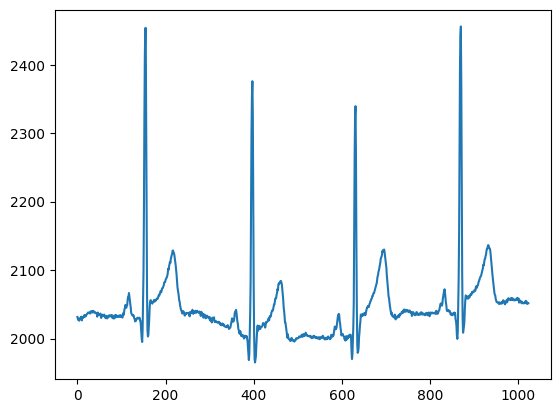

In [28]:
print(len(basl_avg))
import seaborn as sns
sns.lineplot(data=basl_avg)

In [34]:
# Extracting the last 4 seconds of the EEG data (baseline)

import scipy.io as sio
from scipy import signal
import numpy as np
import pandas as pd
from sklearn import preprocessing as pre
import math

fs_EEG = 128 #Hz : sampling rate
N_EEG = math.ceil(fs_EEG*4) # Select a number of points corresponding to 4s

def preprocessing(input,feature):
    overall=signal.firwin(9,[0.0625,0.46875],window='hamming')
    theta=signal.firwin(9,[0.0625,0.125],window='hamming')
    alpha=signal.firwin(9,[0.125,0.203125],window='hamming')
    beta=signal.firwin(9,[0.203125,0.46875],window='hamming')
    filtedData=signal.filtfilt(overall,1,input)
    filtedtheta=signal.filtfilt(theta,1,filtedData)
    filtedalpha=signal.filtfilt(alpha,1,filtedData)
    filtedbeta=signal.filtfilt(beta,1,filtedData)
    ftheta,psdtheta=signal.welch(filtedtheta,nperseg=256)
    falpha,psdalpha=signal.welch(filtedalpha,nperseg=256)
    fbeta,psdbeta=signal.welch(filtedbeta,nperseg=256)
    feature.append(max(psdtheta))
    feature.append(max(psdalpha))
    feature.append(max(psdbeta))
    return feature


if __name__ == '__main__':
    total=0
    path=u'DREAMER.mat'
    data=sio.loadmat(path)
    print("EEG signals are being feature extracted...")
    EEG_tmp=np.zeros((23,18,42))
    for k in range(0,23):
        for j in range(0,18):
            for i in range(0,14):
                B,S=[],[]
                basl=data['DREAMER'][0,0]['Data'][0,k]['EEG'][0,0]['baseline'][0,0][j,0][-1-N_EEG:-1,i]
                #stim=data['DREAMER'][0,0]['Data'][0,k]['EEG'][0,0]['stimuli'][0,0][j,0][-1-N_EEG:-1,i]
                B=preprocessing(basl,B)
                #S=preprocessing(stim,S)
                Extrod=B#np.divide(S,B)
                total+=1
                EEG_tmp[k,j,3*i]=Extrod[0]
                EEG_tmp[k,j,3*i+1]=Extrod[1]
                EEG_tmp[k,j,3*i+2]=Extrod[2]
                print("\rprogress: %d%%" %(total/(23*18*14)*100),end="")
    col=[]
    for i in range(0,14):
        col.append('psdtheta_'+str(i + 1)+'_un')
        col.append('psdalpha_'+str(i + 1)+'_un')
        col.append('psdbeta_'+str(i + 1)+'_un')
    EEG=pd.DataFrame(EEG_tmp.reshape((23 * 18,EEG_tmp.shape[2])),columns=col)
    scaler=pre.StandardScaler()
    for i in range(len(col)):
        EEG[col[i][:-3]]=scaler.fit_transform(EEG[[col[i]]])
    EEG.drop(col,axis=1,inplace=True)
    print(EEG)
    EEG.to_csv('Extracted_EEG_last4s.csv')

EEG signals are being feature extracted...
progress: 100%     psdtheta_1  psdalpha_1  psdbeta_1  psdtheta_2  psdalpha_2  psdbeta_2  \
0     -0.181097   -0.183079  -0.162763   -0.164206   -0.166005  -0.165722   
1     -0.180781   -0.182764  -0.162617   -0.163658   -0.165460  -0.165768   
2     -0.181023   -0.183005  -0.162728   -0.163551   -0.165352  -0.165732   
3     -0.180947   -0.182930  -0.162694   -0.163492   -0.165294  -0.165701   
4     -0.181134   -0.183115  -0.162783   -0.163567   -0.165369  -0.165722   
..          ...         ...        ...         ...         ...        ...   
409   -0.182190   -0.184112  -0.162428   -0.163380   -0.165049  -0.163543   
410   -0.182097   -0.183973  -0.160927   -0.164377   -0.166153  -0.165682   
411   -0.182501   -0.184462  -0.163008   -0.164449   -0.166231  -0.165901   
412   -0.182431   -0.184370  -0.162583   -0.164322   -0.166097  -0.164981   
413   -0.182469   -0.184429  -0.163107   -0.164322   -0.166088  -0.165463   

     psdtheta_3  p

In [17]:
# Ratio between the EEG features and the corresponding baselines
All_Features = pd.read_csv("../DREAMER_features_both")
del All_Features['Unnamed: 0']
Last4s_EEG_Features = pd.read_csv("Extracted_EEG_last4s.csv")
del Last4s_EEG_Features['Unnamed: 0']

Features_Ratio = All_Features[Last4s_EEG_Features.columns].div(Last4s_EEG_Features)
Features_Ratio.head(100)

Features_Ratio = Features_Ratio.join(All_Features['Valence'])
Features_Ratio = Features_Ratio.join(All_Features['Arousal'])

corrMatrix = Features_Ratio.corr()
heatmap_corrMatrix = px.imshow(corrMatrix,
                               title='Cross-correlation matrix (Ratio of All_Features_with_Age_Gender.csv/Extracted_EEG_last4s.csv)',
                               
                y=Features_Ratio.columns,
                x=Features_Ratio.columns#[str('f'+str(j+1)) for j in range(0,Nf-4)]
                )

heatmap_corrMatrix.show()

In [18]:
Correlation_Threshold_Valence = 0.04
Correlation_Threshold_Arousal = 0.04
Mask_Valence=corrMatrix > Correlation_Threshold_Valence
Mask_Arousal=corrMatrix > Correlation_Threshold_Arousal
Relevant_Features_List_Valence = Features_Ratio.columns[Mask_Valence.iloc[-2,:]]
Relevant_Features_List_Valence=Relevant_Features_List_Valence[:-1] # Delete the last element which has cross-correlation of 1
Relevant_Features_List_Arousal = Features_Ratio.columns[Mask_Arousal.iloc[-1,:]]
Relevant_Features_List_Arousal=Relevant_Features_List_Arousal[:-1] # Delete the last element which has cross-correlation of 1
print(Relevant_Features_List_Valence)
print(Relevant_Features_List_Arousal)
# Quite deceiving : Very low correlations
print(Relevant_Features_List_Valence.dtype)

In [19]:
# 1. MinMax the data

All_Features = pd.read_csv("Feature.csv")
del All_Features['Unnamed: 0']
Last4s_EEG_Features = pd.read_csv("Extracted_EEG_last4s.csv")
del Last4s_EEG_Features['Unnamed: 0']

for column in All_Features.columns:
    if not(All_Features[column].dtype == object):
        All_Features[column]=(All_Features[column]-np.min(All_Features[column]))/(np.max(All_Features[column])-np.min(All_Features[column]))
for column in Last4s_EEG_Features.columns:
    if not(Last4s_EEG_Features[column].dtype == object):
        Last4s_EEG_Features[column]=(Last4s_EEG_Features[column]-np.min(Last4s_EEG_Features[column]))/(np.max(Last4s_EEG_Features[column])-np.min(Last4s_EEG_Features[column]))

# 2. Ratio between the EEG features and the corresponding baselines

Features_Ratio = All_Features[Last4s_EEG_Features.columns].div(Last4s_EEG_Features)
Features_Ratio.head(100)

# Heatmap of the cross-correlations with Valence and Arousal without thresholding

Features_Ratio = Features_Ratio.join(All_Features['Valence'])
Features_Ratio = Features_Ratio.join(All_Features['Arousal'])

corrMatrix = Features_Ratio.corr()
heatmap_corrMatrix = px.imshow(corrMatrix,
                               title='(min-max) Cross-correlation matrix (Ratio of All_Features_with_Age_Gender.csv/Extracted_EEG_last4s.csv)',
                               
                y=Features_Ratio.columns,
                x=Features_Ratio.columns#[str('f'+str(j+1)) for j in range(0,Nf-4)]
                )

heatmap_corrMatrix.show()

# 3. Threshold Valence and Arousal
import copy
#Valence = copy.deepcopy(All_Features['Valence'])
#Arousal = copy.deepcopy(All_Features['Arousal'])
#Valence[Valence<0.5]=1
#Valence[Valence>=0.5]=2
#Arousal[Arousal<0.5]=1
#Arousal[Arousal>=0.5]=2
#All_Features['Valence']=Valence

All_Features['Valence'].loc[All_Features['Valence']<0.5]=0
All_Features['Valence'].loc[All_Features['Valence']>=0.5]=1
All_Features['Arousal'].loc[All_Features['Arousal']<0.5]=0
All_Features['Arousal'].loc[All_Features['Arousal']>=0.5]=1

Features_Ratio = All_Features[Last4s_EEG_Features.columns].div(Last4s_EEG_Features)
Features_Ratio = Features_Ratio.join(All_Features['Valence'])
Features_Ratio = Features_Ratio.join(All_Features['Arousal'])

# Heatmap of the cross-correlations with Valence and Arousal without thresholding

#Features_Ratio=sp.stats.zscore(Features_Ratio)
print(np.shape(Features_Ratio))
corrMatrix = Features_Ratio.corr()
heatmap_corrMatrix = px.imshow(corrMatrix,
                               title='(min-max)(Valence and Arousal Thresholded) Cross-correlation matrix (Ratio of All_Features_with_Age_Gender.csv/Extracted_EEG_last4s.csv)',
                               
                y=Features_Ratio.columns,
                x=Features_Ratio.columns#[str('f'+str(j+1)) for j in range(0,Nf-4)]
                )

heatmap_corrMatrix.show()

In [20]:
# 1. zscore the data

All_Features = pd.read_csv("Feature.csv")
del All_Features['Unnamed: 0']
Last4s_EEG_Features = pd.read_csv("Extracted_EEG_last4s.csv")
del Last4s_EEG_Features['Unnamed: 0']

for column in All_Features.columns:
    if not(All_Features[column].dtype == object):
        All_Features[column]=sp.stats.zscore(All_Features[column])
for column in Last4s_EEG_Features.columns:
    if not(Last4s_EEG_Features[column].dtype == object):
        Last4s_EEG_Features[column]=sp.stats.zscore(Last4s_EEG_Features[column])

# 2. Ratio between the EEG features and the corresponding baselines

Features_Ratio = All_Features[Last4s_EEG_Features.columns].div(Last4s_EEG_Features)
Features_Ratio.head(100)

# Heatmap of the cross-correlations with Valence and Arousal without thresholding

Features_Ratio = Features_Ratio.join(All_Features['Valence'])
Features_Ratio = Features_Ratio.join(All_Features['Arousal'])

corrMatrix = Features_Ratio.corr()
heatmap_corrMatrix = px.imshow(corrMatrix,
                               title='(z-scored) Cross-correlation matrix (Ratio of All_Features_with_Age_Gender.csv/Extracted_EEG_last4s.csv)',
                               
                y=Features_Ratio.columns,
                x=Features_Ratio.columns#[str('f'+str(j+1)) for j in range(0,Nf-4)]
                )

heatmap_corrMatrix.show()

# 3. Threshold Valence and Arousal
import copy
#Valence = copy.deepcopy(All_Features['Valence'])
#Arousal = copy.deepcopy(All_Features['Arousal'])
#Valence[Valence<0.5]=1
#Valence[Valence>=0.5]=2
#Arousal[Arousal<0.5]=1
#Arousal[Arousal>=0.5]=2
#All_Features['Valence']=Valence

All_Features['Valence'].loc[All_Features['Valence']<0.5]=0
All_Features['Valence'].loc[All_Features['Valence']>=0.5]=1
All_Features['Arousal'].loc[All_Features['Arousal']<0.5]=0
All_Features['Arousal'].loc[All_Features['Arousal']>=0.5]=1

Features_Ratio = All_Features[Last4s_EEG_Features.columns].div(Last4s_EEG_Features)
Features_Ratio = Features_Ratio.join(All_Features['Valence'])
Features_Ratio = Features_Ratio.join(All_Features['Arousal'])

# Heatmap of the cross-correlations with Valence and Arousal without thresholding

#Features_Ratio=sp.stats.zscore(Features_Ratio)
print(np.shape(Features_Ratio))
corrMatrix = Features_Ratio.corr()
heatmap_corrMatrix = px.imshow(corrMatrix,
                               title='(z-scored)(Valence and Arousal Thresholded) Cross-correlation matrix (Ratio of All_Features_with_Age_Gender.csv/Extracted_EEG_last4s.csv)',
                               
                y=Features_Ratio.columns,
                x=Features_Ratio.columns#[str('f'+str(j+1)) for j in range(0,Nf-4)]
                )

heatmap_corrMatrix.show()